In [12]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
import random

In [13]:
class schema(TypedDict):
    name:str
    couter:int
    number:list[int]

In [14]:
def initialize(state:schema)->schema:
    state["couter"]=0
    return state

def random_node(state:schema)->schema:
    state["number"].append(random.randint(1,10))
    state["couter"]+=1
    return state

def should_continue(state:schema)->schema:
    if(state["couter"]<5):
        return "loop"
    else:
        return "end"

In [ ]:
graph=StateGraph(schema)
graph.add_node("starter",initialize)
#The below two lines are equivalent
# graph.set_entry_point("starter")
graph.add_edge(START,"starter")

graph.add_node("random_node",random_node)
graph.add_edge("starter","random_node")
graph.add_conditional_edges("random_node",should_continue,
                            {
                                "loop":"random_node",
                                "end":END
                            })


In [16]:
app=graph.compile()
result=app.invoke({"name":"nisarg","counter":0,"number":[]})
print(result)

{'name': 'nisarg', 'couter': 5, 'number': [4, 2, 2, 3, 2]}


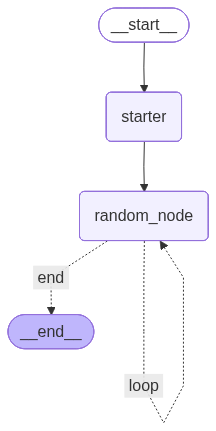

In [17]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))